В файле предоставленна информация о клиентах риэлторской компании США за один месяц. Используя данные о выборке, необходимо построить типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида) (Лид – потенциальный покупатель). Нужно для начала посмотреть как вообще выглядит датасет, взглянуть на форматы данных, быть может их преобразовать в более удобный вид, проверить данные на наличие пропусков и с ними что-нибудь сделать. Начнем

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot

%matplotlib inline

In [2]:
df = pd.read_csv('clients.csv')
df.head(5)

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


Для построения целевого портрета клиента нас не интересуют некоторые столбцы, поэтому есть смысл от них отказаться

In [3]:
data = df[['Type of property',
           'Area (ft.)',
           'Price',
           'Entity',
           'Age at time of purchase',
           'Gender',
           'Source',
           'Purpose']]
data = data.rename(columns={'Age at time of purchase': 'Age'})
data.head(5)

,Type of property,Area (ft.),Price,Entity,Age,Gender,Source,Purpose
0,Apartment,743.09,"$ 246,172.68",Individual,19.0,F,Website,Home
1,Apartment,756.21,"$ 246,331.90",Individual,22.0,F,Website,Home
2,Apartment,587.28,"$ 209,280.91",Individual,22.0,M,Client,Home
3,Apartment,1604.75,"$ 452,667.01",Individual,22.0,M,Website,Investment
4,Apartment,1375.45,"$ 467,083.31",Individual,25.0,F,Agency,Home


Далее необходимо проверить данные на пропуски и "разобраться" с ними

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type of property  195 non-null    object 
 1   Area (ft.)        195 non-null    float64
 2   Price             195 non-null    object 
 3   Entity            195 non-null    object 
 4   Age               178 non-null    float64
 5   Gender            178 non-null    object 
 6   Source            195 non-null    object 
 7   Purpose           195 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.3+ KB


Есть 17 пропусков в данных по стобцам Age и Gender, стоит проверить, может эти пропуски соотвествуют одним и тем же наблюдениям

In [5]:
data[data['Age'].isnull() | data['Gender'].isnull()]

,Type of property,Area (ft.),Price,Entity,Age,Gender,Source,Purpose
178,Office,410.71,"$ 117,564.07",Firm,NaN,NaN,Agency,Investment
179,Office,1200.82,"$ 317,196.40",Firm,NaN,NaN,Website,Investment
180,Office,800.96,"$ 264,142.16",Firm,NaN,NaN,Website,Investment
181,Office,827.87,"$ 222,947.21",Firm,NaN,NaN,Website,Investment
182,Apartment,775.69,"$ 250,312.53",Firm,NaN,NaN,Website,Investment
183,Office,775.69,"$ 246,050.40",Firm,NaN,NaN,Website,Investment
184,Apartment,1604.75,"$ 529,317.28",Firm,NaN,NaN,Website,Investment
185,Apartment,587.28,"$ 169,158.29",Firm,NaN,NaN,Website,Home
186,Apartment,756.21,"$ 206,958.71",Firm,NaN,NaN,Website,Investment
187,Apartment,743.09,"$ 206,445.42",Firm,NaN,NaN,Website,Investment


Да, так и есть. Можно заметить, что покупателем во всех этих наблюдениях является фирма, довольно логично, что нет возраста и пола :)

Стоит также выполнить некоторые преобразования с ценой, чтобы она приняла вид численной переменной и перевести площадь из квадратных футов в квадратные метры

In [6]:
data['Area'] = data['Area (ft.)'].apply(lambda x: x/10.764)
data.drop('Area (ft.)', axis=1, inplace=True)
data.head(5)

,Type of property,Price,Entity,Age,Gender,Source,Purpose,Area
0,Apartment,"$ 246,172.68",Individual,19.0,F,Website,Home,69.034745
1,Apartment,"$ 246,331.90",Individual,22.0,F,Website,Home,70.253623
2,Apartment,"$ 209,280.91",Individual,22.0,M,Client,Home,54.559643
3,Apartment,"$ 452,667.01",Individual,22.0,M,Website,Investment,149.084913
4,Apartment,"$ 467,083.31",Individual,25.0,F,Agency,Home,127.782423


In [7]:
data.loc[data['Price'].str.contains('$')].shape

(195, 8)

Выходит, что все наблюдения содержат цену в одной валюте - доллары США

In [8]:
def transform_string(string):
    symbols = [' ', '$', ',']
    for symbol in symbols:
        string = string.replace(symbol, '')
    return string

data['Price'] = data['Price'].apply(lambda x: float(transform_string(x)))
data.head(5)

,Type of property,Price,Entity,Age,Gender,Source,Purpose,Area
0,Apartment,246172.68,Individual,19.0,F,Website,Home,69.034745
1,Apartment,246331.90,Individual,22.0,F,Website,Home,70.253623
2,Apartment,209280.91,Individual,22.0,M,Client,Home,54.559643
3,Apartment,452667.01,Individual,22.0,M,Website,Investment,149.084913
4,Apartment,467083.31,Individual,25.0,F,Agency,Home,127.782423


In [9]:
data['Entity'].value_counts()

Individual    178
Firm           17
Name: Entity, dtype: int64

<AxesSubplot:ylabel='Entity'>

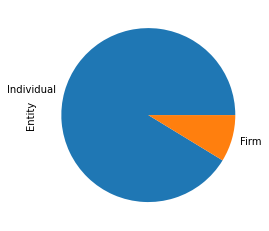

In [10]:
data['Entity'].value_counts().plot.pie()

Персональных сделок чуть больше чем в 10 раз больше, чем от фирм, можно их разелить и посмотреть статистику для юрлиц и физлиц

In [11]:
data_individual = data[data['Entity'] == 'Individual'].drop('Entity', axis=1)
data_individual.head(5)

,Type of property,Price,Age,Gender,Source,Purpose,Area
0,Apartment,246172.68,19.0,F,Website,Home,69.034745
1,Apartment,246331.90,22.0,F,Website,Home,70.253623
2,Apartment,209280.91,22.0,M,Client,Home,54.559643
3,Apartment,452667.01,22.0,M,Website,Investment,149.084913
4,Apartment,467083.31,25.0,F,Agency,Home,127.782423


In [12]:
data_firm = data[data['Entity'] == 'Firm'].drop(['Entity', 'Age', 'Gender'], axis=1)
data_firm.head(5)

,Type of property,Price,Source,Purpose,Area
178,Office,117564.07,Agency,Investment,38.155890
179,Office,317196.40,Website,Investment,111.558900
180,Office,264142.16,Website,Investment,74.411000
181,Office,222947.21,Website,Investment,76.911000
182,Apartment,250312.53,Website,Investment,72.063359


Итак, для начала мы установили, что целевым клиентом риелторской компании является физлицо

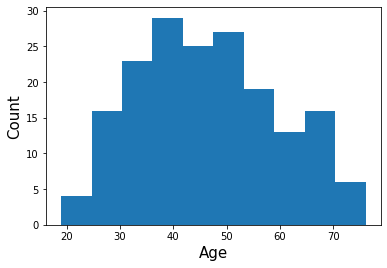

In [13]:
plt.hist(data_individual['Age'], bins=10)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

In [14]:
print('Mean Age: {}\nMedian Age: {}'.format(round(data_individual['Age'].mean(), 2), data_individual['Age'].median()))

Mean Age: 46.15
Median Age: 45.0


Судя по гистограмме распределения и среднему/медиане возрастов, можно заключить, что возраст целевого клиента составляет 45 лет.

In [15]:
print('Mean bill {}'.format(round(data_individual['Price'].mean(), 2)))

Mean bill 270965.43


Выходит, что средняя цена за недвижимость от физлица составляет $ 270,965.43

In [16]:
data_individual['Gender'].value_counts()

M    108
F     70
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

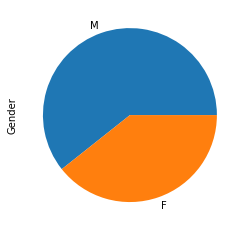

In [17]:
data_individual['Gender'].value_counts().plot.pie()

Судя по распределению, большинство клиентов компании - мужчины

In [18]:
data_individual['Type of property'].value_counts()

Apartment    176
Office         2
Name: Type of property, dtype: int64

<AxesSubplot:ylabel='Type of property'>

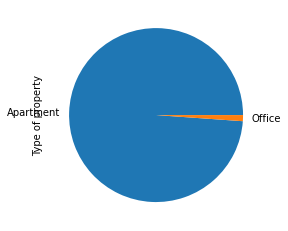

In [19]:
data_individual['Type of property'].value_counts().plot.pie()

Наиболее часто выбираемый тип недвижимости - апартаменты.

In [20]:
data_individual_apartment = data_individual[data_individual['Type of property'] == 'Apartment']
data_individual_apartment.head(5)

,Type of property,Price,Age,Gender,Source,Purpose,Area
0,Apartment,246172.68,19.0,F,Website,Home,69.034745
1,Apartment,246331.90,22.0,F,Website,Home,70.253623
2,Apartment,209280.91,22.0,M,Client,Home,54.559643
3,Apartment,452667.01,22.0,M,Website,Investment,149.084913
4,Apartment,467083.31,25.0,F,Agency,Home,127.782423


In [21]:
print('Mean apartment square for individual purchase: {} square meters'.format(round(data_individual_apartment['Area'].mean()), 3))

Mean apartment square for individual purchase: 84 square meters


<AxesSubplot:ylabel='Purpose'>

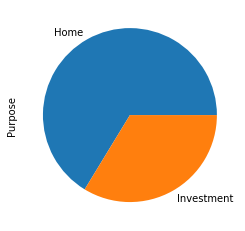

In [22]:
data_individual['Purpose'].value_counts().plot.pie()

<AxesSubplot:ylabel='Source'>

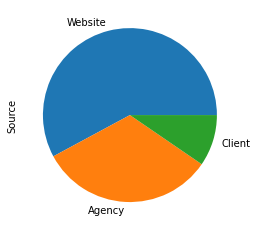

In [23]:
data_individual['Source'].value_counts().plot.pie()

Основной источник лида - вебсайт компании. Основная цель покупки – обретение жилья.

Итак, суммируя все вышеперечисленное, можно установить портрет целевого клиента компании:
мужчина, 45 лет, покупает апартаменты, средней площадью 84 кв.м., средней стоимостью $270965.43, цель - покупка жилья, источник лида - вебсайт.